# Cell-cell interaction analysis (single LR, within-spot)

### 1. Data loading and preprocessing

In [1]:
import stlearn as st
import pandas as pd
import random
st.settings.set_figure_params(dpi=100)
# read in visium dataset downloaded from: support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Breast_Cancer_Block_A_Section_2
data = st.Read10X("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1")
st.add.image(adata=data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_hires_nobg.png",
            library_id="V1_Breast_Cancer_Block_A_Section_1",visium=True)

st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.scale(data)

Added tissue image to the object!
Normalization step is finished in adata.X
Scale step is finished in adata.X


### 2. Cell type diversity

#### Read in the cell type predictions for each spot based on label transfer

label transfer results added to adata.uns['label_transfer']
predicted label added to adata.obs['predictions'].


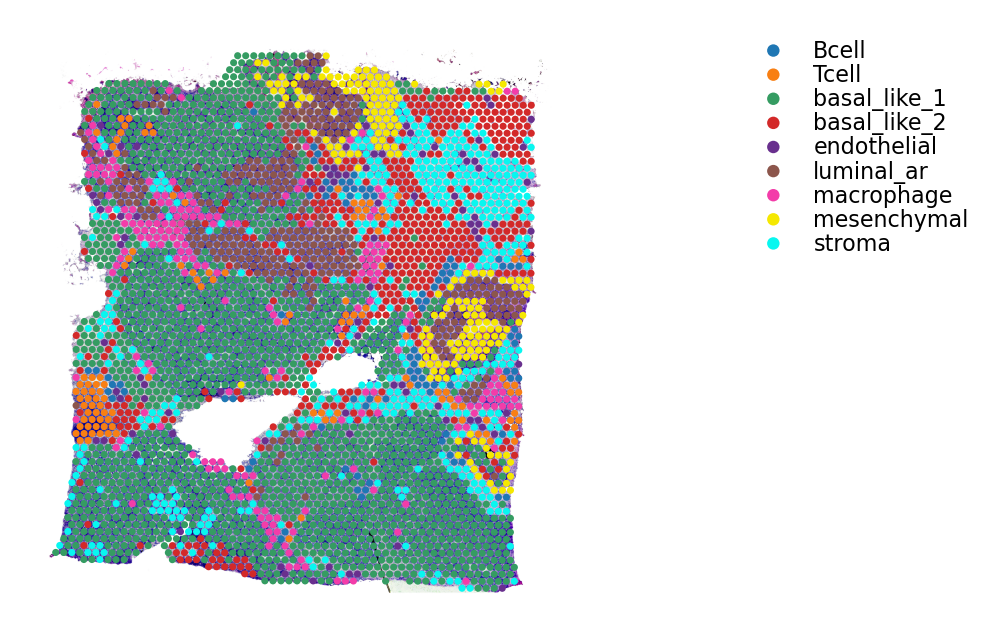

<Figure size 600x400 with 0 Axes>

In [2]:
st.add.labels(data, 'label_transfer_bc.csv')
st.pl.cluster_plot(data,use_label="predictions", name='label_transfer', output='.')

#### Count cell type diversity

Counts for cluster (cell type) diversity stored into adata.uns['cci_het']


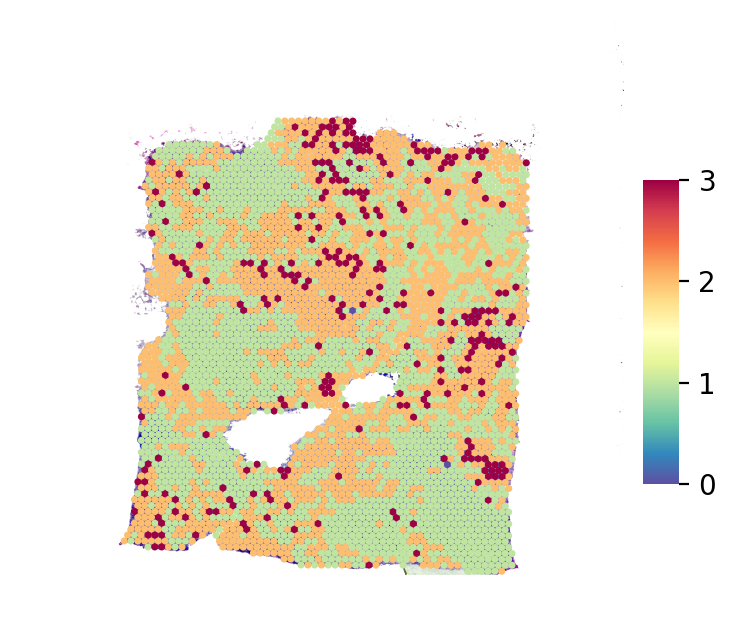

In [3]:
st.tl.cci.het.count(data, use_clustering='label_transfer', distance=0)
st.pl.het_plot(data, use_het='cci_het', name='het_louvain', output='.')

### 3. Ligand-receptor co-expression

#### Read in user input LR pair

In [4]:
data.uns["lr"] = ['IL34_CSF1R']

#### Ligand-receptor co-expression within spots

Altogether 2 valid L-R pairs
L-R interactions with neighbours are counted and stored into adata.uns['cci_lr']


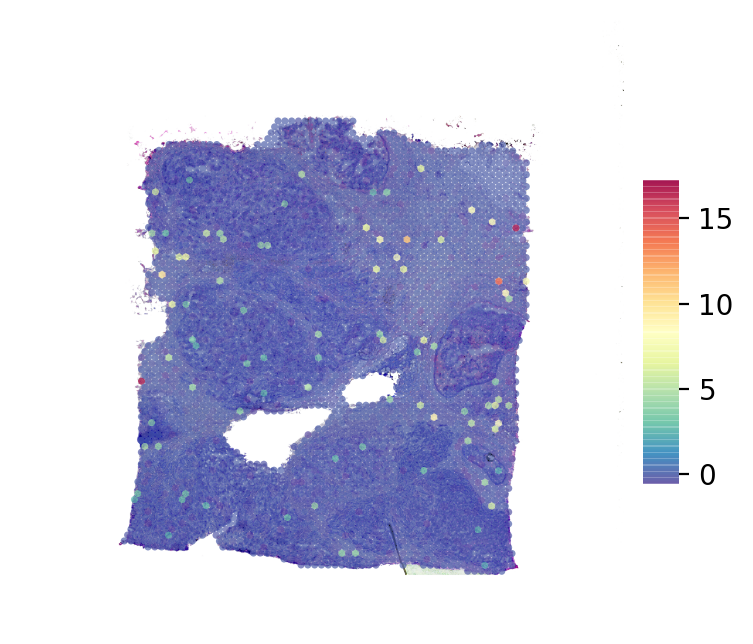

In [5]:
st.tl.cci.base.lr(adata=data, distance=0)
st.pl.het_plot(data, use_het='cci_lr', data_alpha=0.7, name='cci_lr', output='.')

### 4. Merge CCI cell type diversity and L-R co-expression scores

Results of spatial interaction analysis has been written to adata.uns['merged']


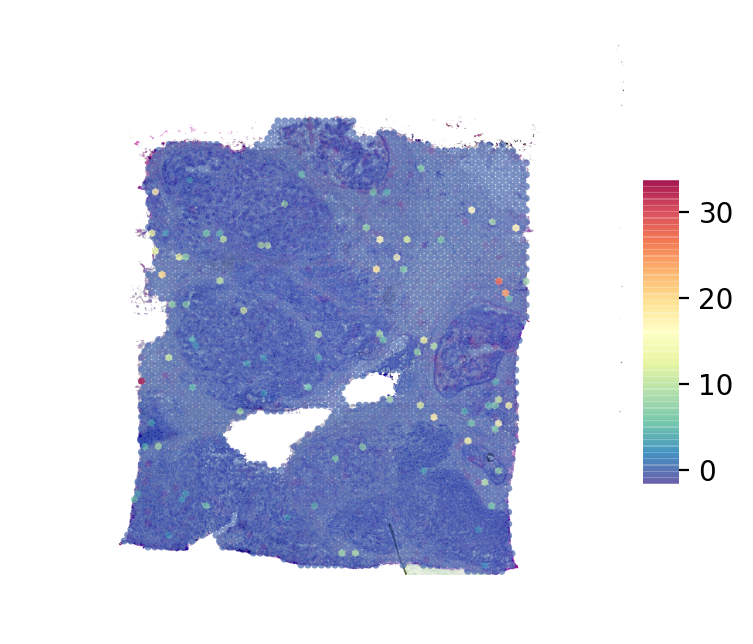

In [6]:
st.tl.cci.merge(data, use_lr='cci_lr', use_het='cci_het')
st.pl.het_plot(data, use_het='merged', data_alpha=0.7, name='merged', output='.')

### Caution! Below steps could take a long time depending on the parameters and data size

#### Permutation Run

In [7]:
st.tl.cci.permutation(data, n_pairs=200, distance=0)

AnnData object with n_obs × n_vars = 3813 × 20687
    obs: 'in_tissue', 'array_row', 'array_col', 'sum_counts', 'imagecol', 'imagerow', 'predictions'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'label_transfer', 'predictions_colors', 'cci_het', 'lr', 'cci_lr', 'merged', 'selected', 'merged_pvalues', 'merged_sign'
    obsm: 'spatial', 'filtered_counts', 'normalized_total'

#### Significance Test against null distribution

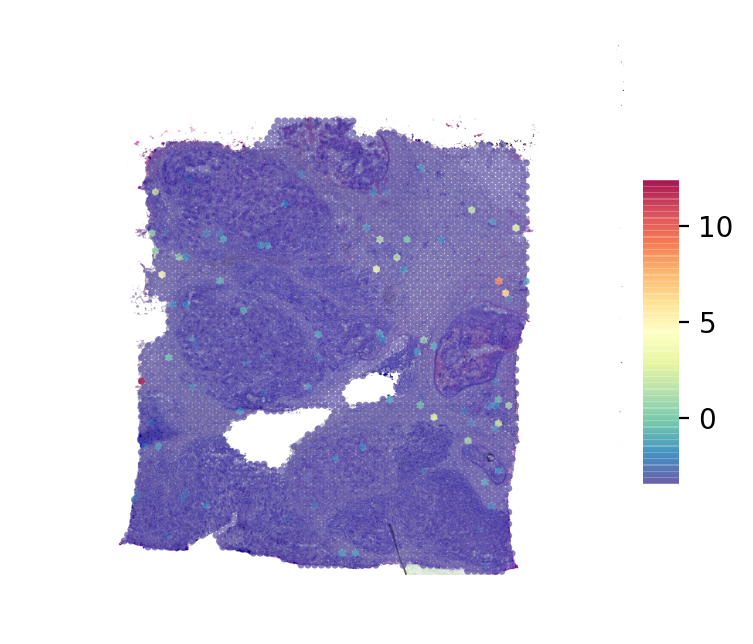

In [8]:
# plot the -log10(pvalue) from permutation test on each spot
st.pl.het_plot(data, use_het='merged_pvalues', data_alpha=0.7, name='permutation', output='.')

#### Final result of hotspot

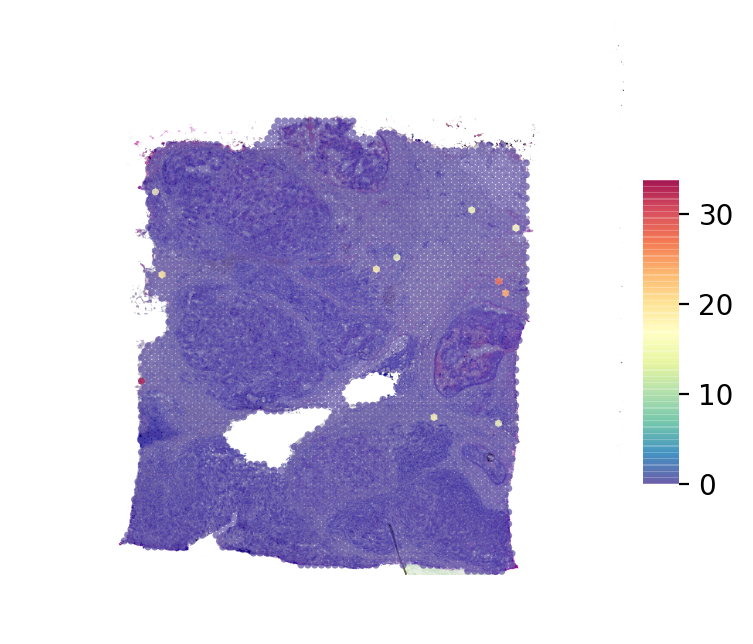

In [9]:
st.pl.het_plot(data, use_het='merged_sign', data_alpha=0.7, name='final', output='.')